In [1]:
%matplotlib inline

import matplotlib
font = {'family':'Yu Mincho'}# 日本語用フォント設定
matplotlib.rc('font', **font) 



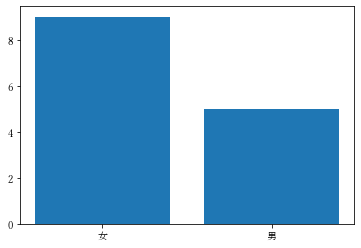

In [2]:
# matplotlibライブラリーのpyplotモジュールをインポートして、別名「plt」に定義
import matplotlib.pyplot as plt


#■■■　例題6-1　P175 ■■■■■■■■■■■■■■■■■■■■■

#【棒グラフ】
#(1) 「test_scores_V2.csv」を読み込み、性別毎の件数で棒グラフを作成してください。

import pandas as pd
from pathlib import Path #<ライブラリのインポート>

nbpath = Path('.').resolve() #<notebookのホームdirectoryパスの取得> C:\Users\u072265
target_dir = nbpath.joinpath('.\work\doc\\02_Pythonデータ加工研修\\01_学習コンテンツ\data\\test_scores_V2.csv') #\work\doc\02_Pythonデータ加工研修\01_学習コンテンツ\data

#-----

df_test = pd.read_csv(target_dir) 
sex_count = df_test["性別"].value_counts()
plt.bar(x=sex_count.index,height=sex_count.values)
plt.show()


In [21]:
#■■■　例題6－2　P177 ■■■■■■■■■■■■■■■■■■■■■

#【箱ひげ図】
#(1) 「kakeibo.csv」を読み込み、家族構成が既婚と未婚の雑費を比較する箱ひげ図を作成 してください。

#最小値
#第1四分位数：下位データの平均値
#中央値：データの中央の値
#平均値
#第3四分位数：上位データの平均値
#最大値

import pandas as pd
from pathlib import Path #<ライブラリのインポート>

nbpath = Path('.').resolve() #<notebookのホームdirectoryパスの取得> C:\Users\u072265
target_dir = nbpath.joinpath('.\work\doc\\02_Pythonデータ加工研修\\01_学習コンテンツ\data\\kakeibo.csv') #\work\doc\02_Pythonデータ加工研修\01_学習コンテンツ\data
#-----

df_kakeibo = pd.read_csv(target_dir)

df_kakeibo.dropna(inplace=True)#nullがある行を削除する（axis=1で列を削除）

df_kakeibo[df_kakeibo['家族構成'] == '未婚']['雑費']
points = ((df_kakeibo[df_kakeibo['家族構成'] == '未婚']['雑費'], df_kakeibo[df_kakeibo['家族構成'] == '既婚']['雑費']))
print(points)
#plt.boxplot(points, labels=["未婚", "既婚"])
#plt.show()

(4      26100
9       8900
10     19200
11     18200
17      5800
       ...  
187     9400
190     6000
191    11500
193    15600
197    24300
Name: 雑費, Length: 87, dtype: int64, 3      27700
5      10100
7      10800
13      9400
14      8000
25     21600
28     18900
36     12600
41     19200
57     31300
62      8100
67     37000
71     14800
75     24900
85     25300
93     21100
102    16700
104    29800
106    11500
112    21200
113    13700
124    29000
127    14700
135    17400
140    26300
156    34000
161     9400
166    22400
170    34700
174    30400
184    30400
192    39400
Name: 雑費, dtype: int64)


Text(0, 0.5, '人数')

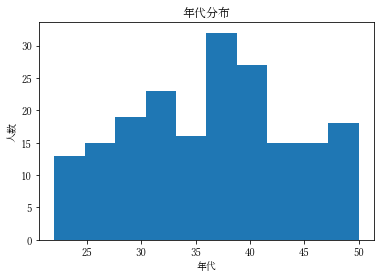

In [7]:
#■■■　例題6－3　P179 ■■■■■■■■■■■■■■■■■■■■■
#<ヒストグラム>

#(1) 年齢を10等分したヒストグラムを作成してください。タイトルは「年代分布」、x軸に「年代」、 y軸に「人数」というラベルをつけてください。

plt.hist(df_kakeibo['年齢'], bins=10)
plt.title('年代分布')
plt.xlabel('年代')
plt.ylabel('人数')


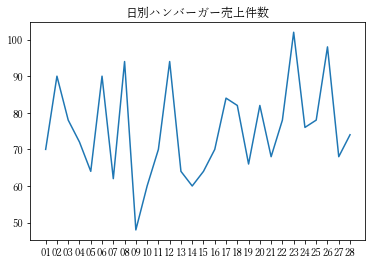

In [8]:
#■■■　例題6－4　P180 ■■■■■■■■■■■■■■■■■■■■■

#<折れ線>
#(1) 日別のハンバーガー売上件数を折れ線グラフで表示してください。

import pandas as pd
from pathlib import Path #<ライブラリのインポート>

nbpath = Path('.').resolve() #<notebookのホームdirectoryパスの取得> C:\Users\u072265
target_dir = nbpath.joinpath('.\work\doc\\02_Pythonデータ加工研修\\01_学習コンテンツ\data\\uriage.csv') #\work\doc\02_Pythonデータ加工研修\01_学習コンテンツ\data
#-----

df_uriage = pd.read_csv(target_dir)

df_uriage["日付"] = pd.to_datetime(df_uriage["日付"])#csvから読み込んだ日付項目はobject型(str型)、datetime型に変換する。 
plt.plot(df_uriage['日付'].dt.strftime('%d'), df_uriage['ハンバーガー売上件数'])#例）月単位の抽出 Df[‘month’] = df.dt.strftime('%m')

plt.title("日別ハンバーガー売上件数")
plt.show()




(30000, 60000)

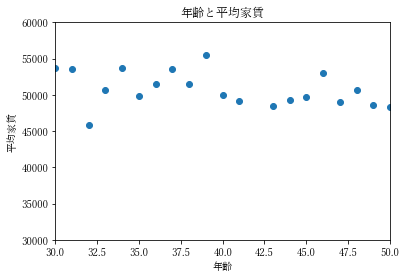

In [13]:
#■■■　例題 6－5　P183 ■■■■■■■■■■■■■■■■■■■■■

#(2) 年齢ごとの平均家賃を集計したdf_kakeibo_meanから、年齢と平均家賃の散布図 を作成してください。
#タイトルは「年齢と平均家賃」、x軸に「年齢」、y軸に「平均家賃」のラベル をつけてください。
#また、x軸は[30,50]、y軸は[30000,60000]の範囲で表示してください。

#データ作成
#as_index=Falseを指定すると、indexとして扱うのをやめる
df_kakeibo_mean = df_kakeibo[['家賃', '年齢']].groupby( by='年齢', as_index=False).mean()

#描画
plt.scatter( x = df_kakeibo_mean['年齢'], y = df_kakeibo_mean['家賃'])
plt.title('年齢と平均家賃')
plt.xlabel('年齢')
plt.ylabel('平均家賃')
plt.xlim(30,50)
plt.ylim(30000, 60000)

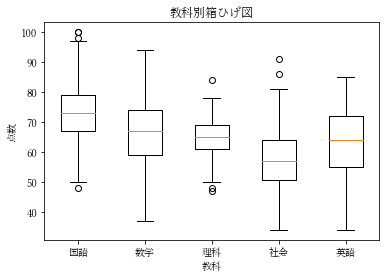

Text(0, 0.5, '点数')

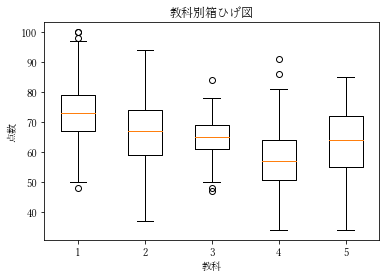

In [36]:
#■■■　演習 6　P185 ■■■■■■■■■■■■■■■■■■■■■

#(1) 演習5(1)で作成したdf_test8を用いて、各教科ごとに箱ひげ図を適切なタイトルと x,y軸ラベル付きで作成してください。

import pandas as pd
from pathlib import Path #<ライブラリのインポート>

nbpath = Path('.').resolve() #<notebookのhomeディレクトリのパスのを取得>
target_dir = nbpath.joinpath('.\df_test7.csv') 
#<パスの組み立て> Notebookのhomeディレクトリ パスから相対パスで指定する

target_dir = pd.read_csv(target_dir)
df_test8 = target_dir.drop("Unnamed: 0",axis = 1)
df_test8

#-----
df_test8.dropna(inplace=True)#nullがある行を削除する（axis=1で列を削除）

points = ((df_test8['国語'],df_test8['数学'],df_test8['理科'],df_test8['社会'],df_test8['英語']))
plt.boxplot(points, labels=["国語", "数学", "理科", "社会", "英語"])
plt.title('教科別箱ひげ図')
plt.xlabel('教科')
plt.ylabel('点数')
plt.show()


#回答-------------------------------------------

#環境設定
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib
font = {'family':'Yu Mincho'}
matplotlib.rc('font', **font)

#描画
points = (df_test8['国語'], df_test8['数学'], df_test8['理科'],df_test8['社会'], df_test8['英語'])
plt.boxplot(points)
plt.title('教科別箱ひげ図')
plt.xlabel('教科')
plt.ylabel('点数')

In [ ]:
#(2) (1)で作成した箱ひげ図にそれぞれ教科名のラベルを付けてください。